In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [22]:
df = pd.read_csv('data.csv')

t_data = df['Time (s)'].values
x_data = df['Position (m)'].values

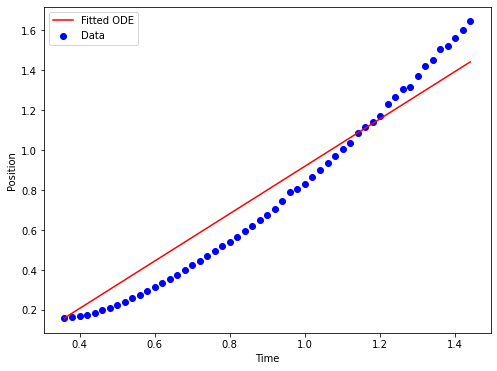

Fitted parameters: k = 8.61269473403251, c = 0.0, t_shift = 0.0


In [42]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# Define the ODE function for dx/dt = 9.8 - k * (x(t - t_shift))^c
def odefunc(t, x, k, c, t_shift):
    shifted_x = np.interp(t - t_shift, t_data, x_data, left=0.0)  # Left extrapolation set to 0
    return 9.8 - k * (shifted_x)**c

# Custom ODE solver using the Euler method
def custom_solver(odefunc, t, x0, k, c, t_shift):
    x = [x0]
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        x_new = x[-1] + odefunc(t[i-1], x[-1], k, c, t_shift) * dt
        x.append(x_new)
    return np.array(x)

# Load your position vs. time data from a CSV file
data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)
t_data = data[:, 0]
x_data = data[:, 1]

# Define bounds for parameter values
bounds = [(0, 10), (0, 10), (0, 50)]  # Adjust the bounds as needed

# Fit the parameters k, c, and t_shift using differential evolution with bounds
def error(params):
    k, c, t_shift = params
    x_pred = custom_solver(odefunc, t_data, x_data[0], k, c, t_shift)
    return np.sum((x_pred - x_data)**2)

# Use differential evolution for optimization
result = differential_evolution(error, bounds, maxiter=1000)
k_fit, c_fit, t_shift_fit = result.x

# Generate a higher-resolution time array for the fitted data
t_fit = np.linspace(t_data[0], t_data[-1] - t_shift_fit, 100)
x_fit = custom_solver(odefunc, t_fit, x_data[0], k_fit, c_fit, t_shift_fit)

# Plot the original data and the fitted ODE
plt.figure(figsize=(8, 6))
plt.scatter(t_data, x_data, label='Data', color='blue')
plt.plot(t_fit, x_fit, label='Fitted ODE', color='red')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

print(f"Fitted parameters: k = {k_fit}, c = {c_fit}, t_shift = {t_shift_fit}")
